# Imports

In [1]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [45]:
import numpy as np
import pandas as pd
import yfinance as yf
import copy
import matplotlib.pyplot as plt
import datetime as dt
import random as rd
import time
from wordcloud import WordCloud
import os
from google.colab import files
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


# Functions

In [3]:
# for new index of a data frame:
def ind(df):
  length = len(df)
  df_range = range(length)
  return df_range

# the following functions give back a list of data frames
# function for searching after keywords in a data frame
def kw_func(df,kw):
  index = df[df['Text'].str.contains('|'.join(kw), case=False)].index
  new_df = df.loc[index]
  ni = range(len(new_df))
  new_df.index = ni
  return new_df

# putting the data frames in a list from the function above
def lst_kws(df,kws):
  lst = []
  for kw in kws:
    ind = pd.DataFrame(kw_func(df,kw))
    lst.append(ind)
  return lst

# function for sentimental analysis
def sa(df,kws):
  lst = lst_kws(df,kws)
  # only using for new_dataframe
  for d in lst:
    # Initialize the sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Create an empty list to store sentiment labels
    sentiment_labels = []

    # Perform sentiment analysis on the text
    sent_lambda = lambda text: analyzer.polarity_scores(text)["compound"]
    d['Sentiment'] = d['Text'].apply(sent_lambda)
    for i in range(len(d)):
      if d.at[i,'Sentiment'] >= 0.05:
        sentiment_labels.append('Positive')
      elif d.at[i,'Sentiment'] <= -0.05:
        sentiment_labels.append('Negative')
      else:
        sentiment_labels.append('Neutral')
    d['Sentiment Label'] = sentiment_labels
  return lst

# Stocks

In [4]:
# tickers
aaple = 'AAPL'
google = 'GOOG' # Alphabet cop.
microsoft = 'MSFT'
pfizer = 'PFE'

# start and end date
start = '2020-01-01'
end = '2023-01-01'

# Downloading Stock data
apl = yf.download(aaple,start=start,end=end)
goog = yf.download(google,start=start,end=end)
ms = yf.download(microsoft,start=start,end=end)
pfe = yf.download(pfizer,start=start,end=end)

# date column
apl['Date'] = apl.index.date
goog['Date'] = goog.index.date
ms['Date'] = ms.index.date
pfe['Date'] = pfe.index.date


# Put downloaded data in data frames
apl = pd.DataFrame(apl)
goog = pd.DataFrame(goog)
ms = pd.DataFrame(ms)
pfe = pd.DataFrame(pfe)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


If the code doesn't work for download the stocks data, use the following code:

In [5]:
# # Getting data
# !wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/Stocks/AAPL_Stock_Data.zip
# !wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/Stocks/GOOG_Stock_Data.zip
# !wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/Stocks/MSFT_Stock_Data.zip
# !wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/Stocks/PFE_Stock_Data.zip

# # Unzip the files:
# !unzip AAPL_Stock_Data.zip
# !unzip GOOG_Stock_Data.zip
# !unzip MSFT_Stock_Data.zip
# !unzip PFE_Stock_Data.zip

# # Put in Data Frames:
# apl = pd.read_csv('AAPL_Stock_Data.csv')
# goog = pd.read_csv('GOOG_Stock_Data.csv')
# ms = pd.read_csv('MSFT_Stock_Data.csv')
# pfe = pd.read_csv('PFE_Stock_Data.csv')

Plot the stock data.

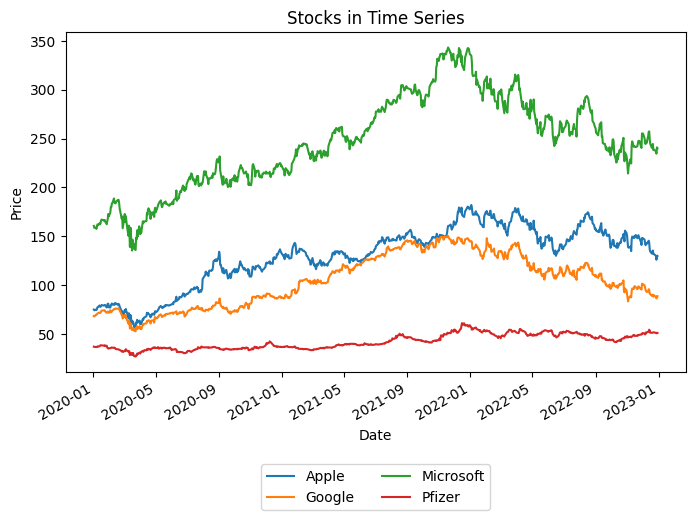

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
apl['Close'].plot(label='Apple')
goog['Close'].plot(label='Google')
ms['Close'].plot(label='Microsoft')
pfe['Close'].plot(label='Pfizer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stocks in Time Series')
plt.savefig('timeseriesstocks.png', dpi=500, transparent=True,bbox_inches = 'tight')

fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# plt.show()
# plt.savefig('Stocks.png',dpi=fig.dpi,transparent=True)

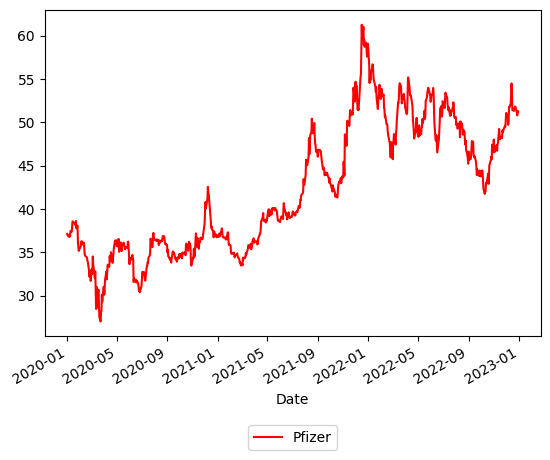

In [7]:
fig, ax = plt.subplots()
pfe['Close'].plot(label='Pfizer', color='red')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
plt.savefig('Pfizer.png',dpi=600,bbox_inches = 'tight',transparent=True)

# Data
Getting the data from github. For getting the data from Kaggle, please look at the notebook Data-Manipulation-1.ipynb. For data preparation for sentimental analysis please look at the notebook Data-Manipulation-2.ipynb.

In [8]:
# Download prepared data for sentimental analysis
!wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/SA-Data/CNBC-SA.zip
!wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/SA-Data/CNN-SA.zip
!wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/SA-Data/NYT-SA.zip
!wget https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/SA-Data/YSP-SA.zip

# Unzip the files
!unzip CNBC-SA.zip
!unzip CNN-SA.zip
!unzip YSP-SA.zip
!unzip NYT-SA.zip

# put data in data frames
new_cnbc = pd.read_csv('CNBC-SA.csv')
new_cnn = pd.read_csv('CNN-SA.csv')
new_nyt = pd.read_csv('NYT-SA.csv')
new_ysp = pd.read_csv('YSP-SA.csv')

--2023-07-14 12:41:18--  https://github.com/QuantLet/DEDA_class_SoSe2023/raw/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/SA-Data/CNBC-SA.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/QuantLet/DEDA_class_SoSe2023/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/SA-Data/CNBC-SA.zip [following]
--2023-07-14 12:41:19--  https://raw.githubusercontent.com/QuantLet/DEDA_class_SoSe2023/main/DEDA_class_SoSe2023_Covid-19_Financial_News_Sentiment_Analysis/Data/SA-Data/CNBC-SA.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108959 (106K) [applic

In [9]:
# keywords
kw_cor = [
          'corona', 'virus','mask',
          'pandemic','isolation','self isolation',
          'social distance', 'covid', 'covid-19',
          'covid 19', 'formite', 'epidemic','outbreak',
          'contact tracing', 'martial law', 'self quarantine',
          'quarantine',
          'super spreader', 'contagious', 'infectious'
          ]
kw_ap = ['apple']
kw_pf = ['pfizer']
kw_ms = ['microsoft']
kw_gg = ['google']
kws = [kw_cor, kw_ap, kw_pf,kw_ms,kw_gg]

# Sentiment Analysis

In [10]:
# Sentiment Analysis
sa_cnbc = sa(new_cnbc,kws)
sa_cnn = sa(new_cnn,kws)
sa_ysp = sa(new_ysp,kws)
sa_nyt = sa(new_nyt,kws)

# putting data frames into a list
super_sa = [sa_cnbc,sa_cnn,sa_ysp,sa_nyt]

In [11]:
# change data frames colum Date the data type
for i in range(len(super_sa)):
    for j in range(len(super_sa[i])):
        super_sa[i][j]['Date'] = pd.DatetimeIndex(super_sa[i][j]['Date'])

# Word Cloud
Using our defined keywords.

## CNBC

In [12]:
# # Define the keywords
# kw = [kw_cor, kw_ap, kw_pf,kw_ms,kw_gg]

# # Initialize the sentiment analyzer
# analyzer = SentimentIntensityAnalyzer()

# # Create an empty DataFrame to store sentiment data
# sentiment_data_cnbc = pd.DataFrame(columns=['Text', 'Compound Sentiment Score', 'Date', 'Keywords'])

# # Create an empty list to store sentiment labels
# sentiment_labels = []

# # Iterate over the keywords
# for keyword in kw:

#     # Iterate over each row in the DataFrame
#     for index, row in new_cnbc.iterrows():
#         # Extract the text and date from the row
#         text = str(row['Text'])
#         date_str = row['Date']

#         # Perform sentiment analysis on the text
#         sentiment = analyzer.polarity_scores(text)
#         compound_score = sentiment["compound"]

#         # Check if the keyword is mentioned in the text
#         mentioned_keywords = [kw for kw in keyword if kw.lower() in text.lower()]

#         # Create a DataFrame for the current row
#         row_data = pd.DataFrame({'Text': [text], 'Compound Sentiment Score': [compound_score], 'Date': [date_str],
#                                  'Keywords': [mentioned_keywords]})

#         # Concatenate the current row DataFrame with the sentiment_data DataFrame
#         sentiment_data_cnbc = pd.concat([sentiment_data_cnbc, row_data], ignore_index=True)

#         # Assign a label based on the compound score
#         if compound_score >= 0.05:
#             sentiment_labels.append('Positive')
#         elif compound_score <= -0.05:
#             sentiment_labels.append('Negative')
#         else:
#             sentiment_labels.append('Neutral')

# # Add the sentiment labels to the DataFrame
# sentiment_data_cnbc['Sentiment Label'] = sentiment_labels

# # Print the sentiment data DataFrame
# # print(sentiment_data_cnbc)


In [13]:
# sentiment_data_cnbc.to_csv('SA-CNBC.csv',encoding='utf-8-sig')
# files.download('SA-CNBC.csv')

In [14]:
# # Combine all mentioned keywords into a single string
# keywords_combined = ' '.join(sentiment_data_cnbc['Keywords'].sum())

# # Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_combined)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

## CNN

In [15]:
# # Create an empty DataFrame to store sentiment data
# sentiment_data_cnn = pd.DataFrame(columns=['Text', 'Compound Sentiment Score', 'Date', 'Keywords'])

# # Create an empty list to store sentiment labels
# sentiment_labels = []

# # Iterate over the keywords
# for keyword in kw:

#     # Iterate over each row in the DataFrame
#     for index, row in new_cnn.iterrows():
#         # Extract the text and date from the row
#         text = str(row['Text'])
#         date_str = row['Date']

#         # Perform sentiment analysis on the text
#         sentiment = analyzer.polarity_scores(text)
#         compound_score = sentiment["compound"]

#         # Check if the keyword is mentioned in the text
#         mentioned_keywords = [kw for kw in keyword if kw.lower() in text.lower()]

#         # Create a DataFrame for the current row
#         row_data = pd.DataFrame({'Text': [text], 'Compound Sentiment Score': [compound_score], 'Date': [date_str],
#                                  'Keywords': [mentioned_keywords]})

#         # Concatenate the current row DataFrame with the sentiment_data DataFrame
#         sentiment_data_cnn = pd.concat([sentiment_data_cnn, row_data], ignore_index=True)

#         # Assign a label based on the compound score
#         if compound_score >= 0.05:
#             sentiment_labels.append('Positive')
#         elif compound_score <= -0.05:
#             sentiment_labels.append('Negative')
#         else:
#             sentiment_labels.append('Neutral')

# # Add the sentiment labels to the DataFrame
# sentiment_data_cnn['Sentiment Label'] = sentiment_labels

# # Print the sentiment data DataFrame
# # print(sentiment_data_cnn)


In [16]:
# sentiment_data_cnn.to_csv('SA-CNN.csv',encoding='utf-8-sig')
# files.download('SA-CNN.csv')

In [17]:
# # Combine all mentioned keywords into a single string
# keywords_combined = ' '.join(sentiment_data_cnn['Keywords'].sum())

# # Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_combined)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

## Mega plot

In [18]:
# cnn_sa = pd.read_csv('/content/SA-CNN.csv', error_bad_lines=False,  encoding='utf-8')

In [19]:
# cnbc_sa = pd.read_csv('/content/SA-CNBC.csv')

# Histograms

## First Version

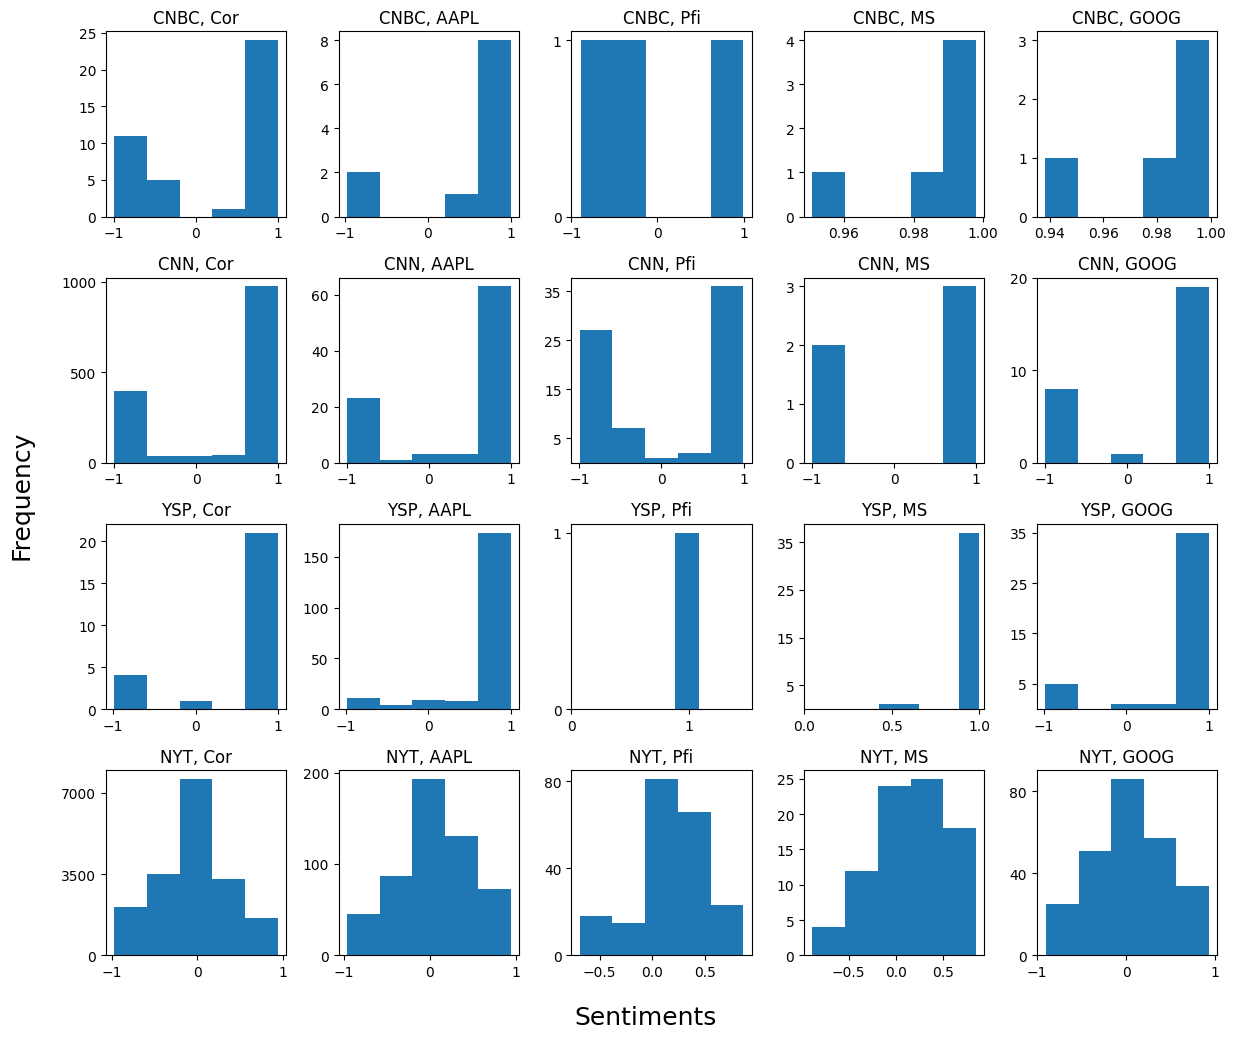

In [20]:
# Distribution of Sentiments
fig, axs = plt.subplots(len(super_sa), len(super_sa[0]), figsize=(12, 10))

kws_names = ['Cor', 'AAPL', 'Pfi', 'MS', 'GOOG']
source = ['CNBC', 'CNN', 'YSP', 'NYT']
for i in range(len(super_sa)):
    for j in range(len(super_sa[i])):
        if i == 0 and j == 2:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0, 1])
          ax.set_xticks([-1,0, 1])
        elif i==1 and j == 2:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([ 5,15,25,35])
        elif i==1 and j == 0:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([ 0,500,1000])
        elif i==1 and j == 4:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0, 10,20])
        elif i==2 and j == 2:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0, 1])
          ax.set_xticks([0,1])
        elif i==2 and j == 3:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([ 5,15,25,35])
          ax.set_xticks([0,0.5,1])
        elif i==2 and j == 4:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([ 5,15,25,35])
        elif i==3 and j == 4:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_xticks([-1,0,1])
          ax.set_yticks([0,40,80])
        elif i==3 and j == 0:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0, 3500,7000])
        elif i==3 and j == 1:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,100,200])
        elif i==3 and j==2:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,40,80])
        else:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment'].hist(ax=ax, grid=False,bins=5)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          # Set x-axis limits
          # ax.set_xlim(-1, 1)

# Set x-label and y-label for the entire plot
fig.text(0.5, -.03, 'Sentiments', ha='center',fontsize=18)
fig.text(-.03, 0.5, 'Frequency', va='center', rotation='vertical',fontsize=18)

plt.tight_layout()
# plt.show()
# plt.savefig('SA-Histogram.png',dpi=600, transparent=True,bbox_inches = 'tight')


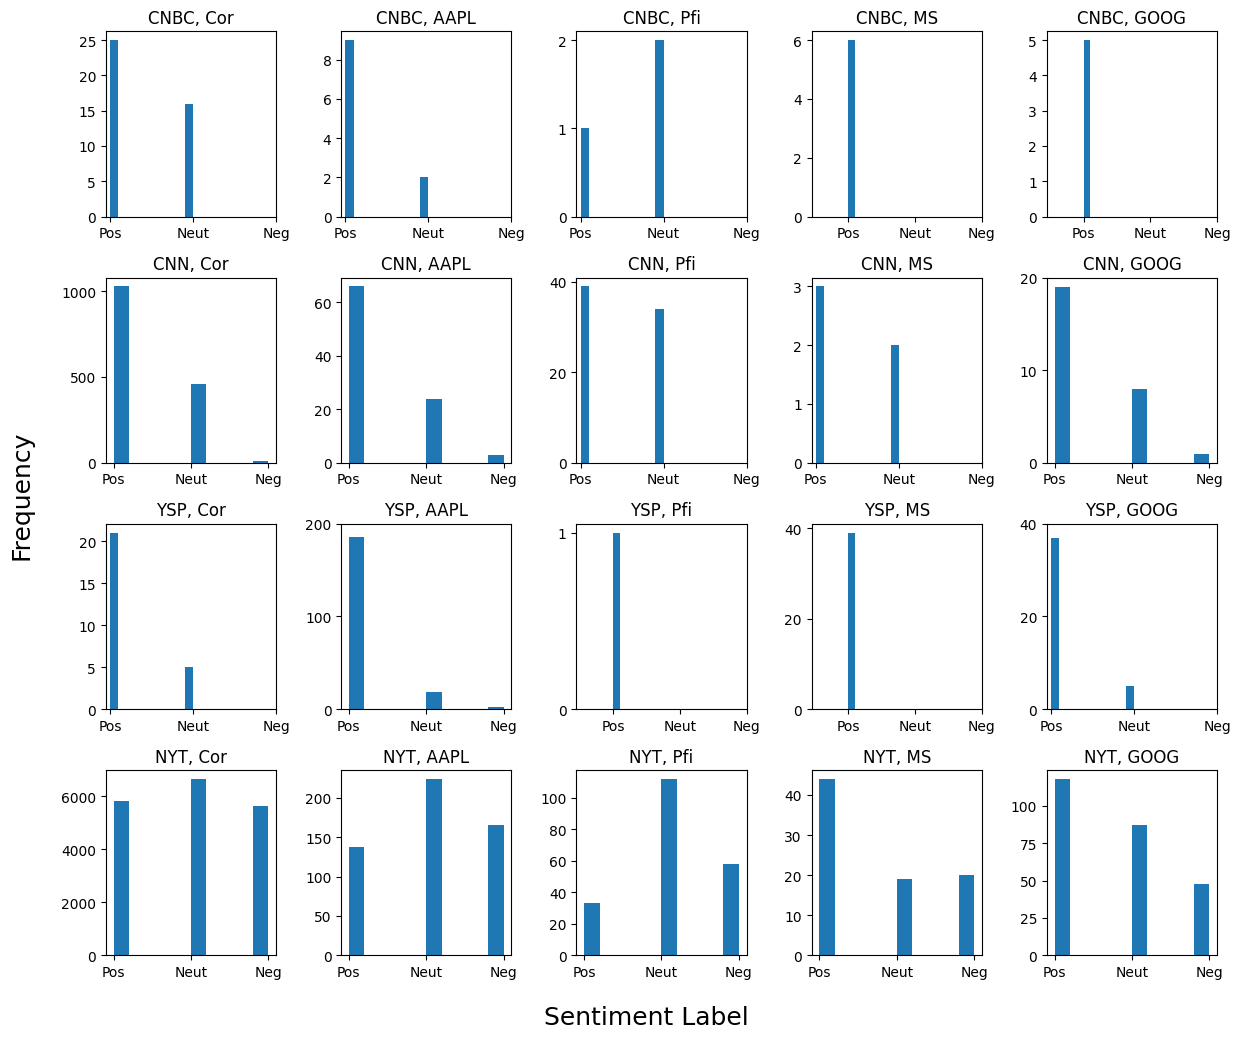

In [21]:
# for the Sentiment label
label_colors = {'Pos': 'green', 'Neut': 'blue', 'Neg': 'red'}
# Define the color for all bars
bar_color = 'lightgray'

fig, axs = plt.subplots(len(super_sa), len(super_sa[0]), figsize=(12, 10))

kws_names = ['Cor', 'AAPL', 'Pfi', 'MS', 'GOOG']
source = ['CNBC', 'CNN', 'YSP', 'NYT']
for i in range(len(super_sa)):
    for j in range(len(super_sa[i])):
        if i == 0 and j == 2:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,1,2])

          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        elif i == 1 and j == 0:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,500,1000])

          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        elif i == 1 and j == 2:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,20,40])


          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        elif i == 1 and j == 4:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,10,20])


          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        elif i == 2 and j == 1:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,100,200])

          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        elif i == 2 and j == 2:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,1])

          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        elif i == 2 and j == 3:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,20,40])

          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        elif i == 2 and j == 4:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')
          ax.set_yticks([0,20,40])

          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))

        else:
          ax = axs[i, j]
          super_sa[i][j]['Sentiment Label'].hist(ax=ax, grid=False)
          ax.set_title(f'{source[i]}, {kws_names[j]}')

          # Add x-labels with corresponding colors
          ax.set_xticks(range(len(label_colors)))
          ax.set_xticklabels(label_colors.keys())
          # ax.tick_params(axis='x', colors=list(label_colors.values()))


# Set x-label and y-label for the entire plot
fig.text(0.5, -.03, 'Sentiment Label', ha='center',fontsize=18)
fig.text(-.03, 0.5, 'Frequency', va='center', rotation='vertical',fontsize=18)

plt.tight_layout()
# plt.show()
plt.savefig('SA-Results.png',dpi=600, transparent=True,bbox_inches = 'tight')


## Final Version

In [22]:
multi_arr = np.zeros((4,5,3))
for i in range(len(super_sa)):
  for j in range(len(super_sa[i])):
    for k in range(len(super_sa[i][j])):
      if super_sa[i][j]['Sentiment Label'][k] == 'Positive':
        multi_arr[i][j][0] += 1 # positive
      elif super_sa[i][j]['Sentiment Label'][k] == 'Negative':
        multi_arr[i][j][1] += 1 # negative
      elif super_sa[i][j]['Sentiment Label'][k] == 'Neutral':
        multi_arr[i][j][2] += 1 # neutral

In [23]:
multi_arr[3]

array([[5832., 6663., 5646.],
       [ 224.,  166.,  138.],
       [ 112.,   33.,   58.],
       [  44.,   19.,   20.],
       [ 118.,   87.,   48.]])

### After Keywords

In [24]:
kw_arr = np.zeros((5,3))

In [25]:
for i in range(len(multi_arr)):
  kw_arr += multi_arr[i]

In [26]:
kw_arr

array([[6905., 7140., 5658.],
       [ 485.,  210.,  143.],
       [ 153.,   69.,   58.],
       [  92.,   21.,   20.],
       [ 179.,  100.,   49.]])

### After Sources

In [27]:
s_arr = np.zeros((4,3))
s_arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
for i in range(len(multi_arr)):
  for j in range(len(multi_arr[i])):
    s_arr[i] += multi_arr[i][j]

In [29]:
s_arr

array([[4.600e+01, 2.000e+01, 0.000e+00],
       [1.154e+03, 5.240e+02, 1.600e+01],
       [2.840e+02, 2.800e+01, 2.000e+00],
       [6.330e+03, 6.968e+03, 5.910e+03]])

### Plot

In [30]:
kw_arr

array([[6905., 7140., 5658.],
       [ 485.,  210.,  143.],
       [ 153.,   69.,   58.],
       [  92.,   21.,   20.],
       [ 179.,  100.,   49.]])

In [31]:
# for keywords
kw_arr_pos = np.zeros(5)
kw_arr_neg = np.zeros(5)
kw_arr_neut = np.zeros(5)

# for sources:
s_arr_pos = np.zeros(4)
s_arr_neg = np.zeros(4)
s_arr_neut = np.zeros(4)

In [32]:
for i in range(len(kw_arr)):
  kw_arr_pos[i] += kw_arr[i][0]
  kw_arr_neg[i] += kw_arr[i][1]
  kw_arr_neut[i] += kw_arr[i][2]

for i in range(len(s_arr)):
  s_arr_pos[i] += s_arr[i][0]
  s_arr_neg[i] += s_arr[i][1]
  s_arr_neut[i] += s_arr[i][2]

In [33]:
s_arr

array([[4.600e+01, 2.000e+01, 0.000e+00],
       [1.154e+03, 5.240e+02, 1.600e+01],
       [2.840e+02, 2.800e+01, 2.000e+00],
       [6.330e+03, 6.968e+03, 5.910e+03]])

In [34]:
for i in range(len(kw_arr_neut)):
  print(kw_arr_neut)

[5658.  143.   58.   20.   49.]
[5658.  143.   58.   20.   49.]
[5658.  143.   58.   20.   49.]
[5658.  143.   58.   20.   49.]
[5658.  143.   58.   20.   49.]


In [46]:
xlabel = ['Corona', 'Apple','Pfizer', 'Microsoft', 'Google']
xticks = [1,2,3,4,5]

Text(0, 0.5, 'Count')

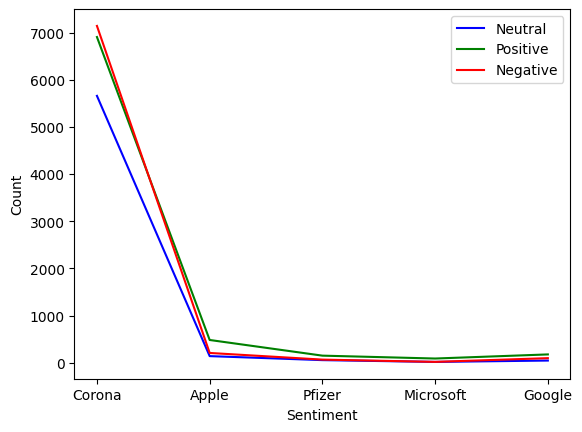

In [72]:
plt.plot(xticks,kw_arr_neut ,label='Neutral', color='blue')
plt.plot(xticks,kw_arr_pos ,label='Positive', color='green')
plt.plot(xticks ,kw_arr_neg ,label='Negative', color='red')
plt.legend()
plt.xticks(xticks, xlabel)

plt.xlabel('Sentiment')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

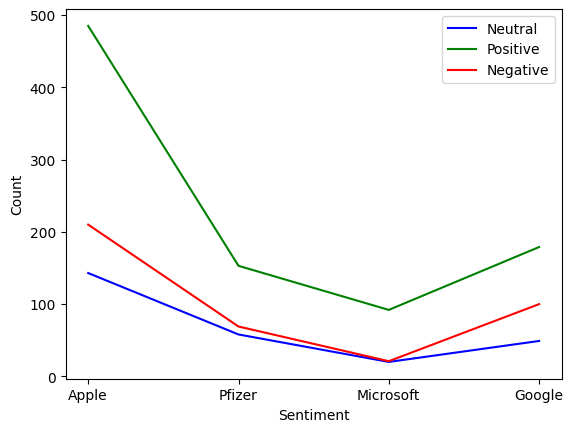

In [35]:
plt.plot(xticks[1:],kw_arr_neut[1:],label='Neutral', color='blue')
plt.plot(xticks[1:],kw_arr_pos[1:],label='Positive', color='green')
plt.plot(xticks[1:],kw_arr_neg[1:],label='Negative', color='red')
plt.legend()
plt.xticks(xticks[1:], xlabel[1:])

plt.xlabel('Sentiment')
plt.ylabel('Count')


In [36]:
s_arr_neut

array([0.00e+00, 1.60e+01, 2.00e+00, 5.91e+03])

In [37]:
s_arr_neg

array([  20.,  524.,   28., 6968.])

Text(0, 0.5, 'Count')

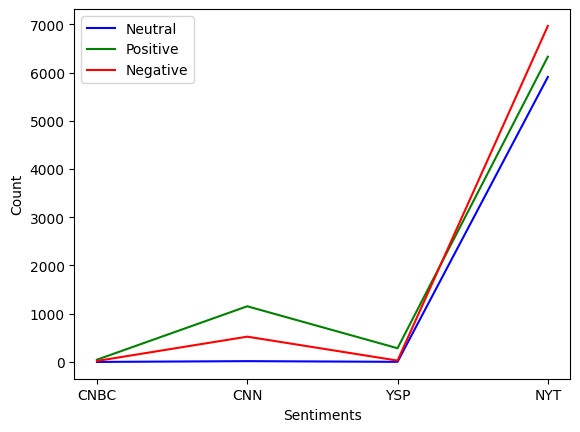

In [77]:
xlabel3 = ['CNBC','CNN','YSP','NYT']
xticks3 = [1,2,3,4]
plt.plot(xticks3,s_arr_neut,label='Neutral', color='blue')
plt.plot(xticks3,s_arr_pos,label='Positive', color='green')
plt.plot(xticks3,s_arr_neg,label='Negative', color='red')
plt.legend()
plt.xticks(xticks3,xlabel3)
plt.xlabel('Sentiments')
plt.ylabel('Count')

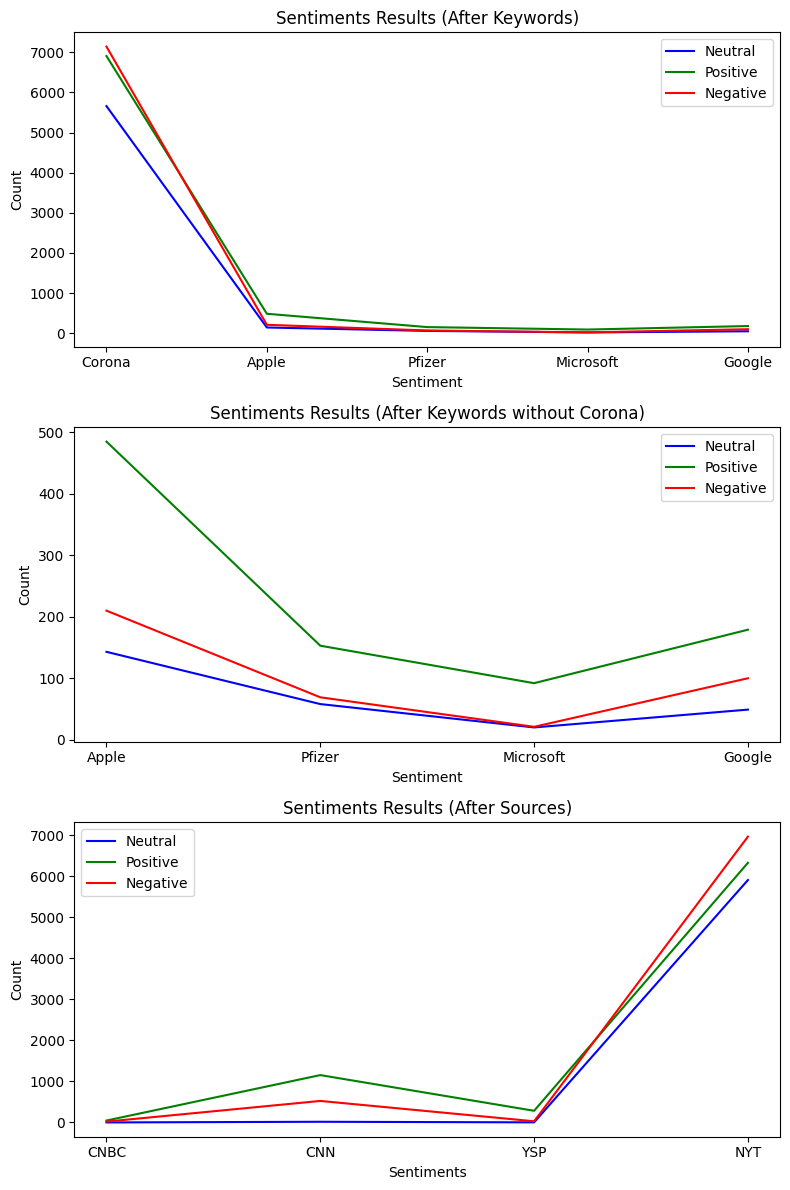

In [80]:
xlabel1 = ['Corona', 'Apple','Pfizer', 'Microsoft', 'Google']
xticks1 = [1,2,3,4,5]
# Data for the second subplot
xlabel2 = xlabel1[1:]
xticks2 = xticks1[1:]
kw_arr_neut2 = kw_arr_neut[1:]
kw_arr_pos2 = kw_arr_pos[1:]
kw_arr_neg2 = kw_arr_neg[1:]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot the first subplot
axs[0].plot(xticks1, kw_arr_neut, label='Neutral', color='blue')
axs[0].plot(xticks1, kw_arr_pos, label='Positive', color='green')
axs[0].plot(xticks1, kw_arr_neg, label='Negative', color='red')
axs[0].legend()
axs[0].set_xticks(xticks1)
axs[0].set_xticklabels(xlabel1)
axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Count')
axs[0].set_title('Sentiments Results (After Keywords)')

# Plot the second subplot
axs[1].plot(xticks2, kw_arr_neut2, label='Neutral', color='blue')
axs[1].plot(xticks2, kw_arr_pos2, label='Positive', color='green')
axs[1].plot(xticks2, kw_arr_neg2, label='Negative', color='red')
axs[1].legend()
axs[1].set_xticks(xticks2)
axs[1].set_xticklabels(xlabel2)
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].set_title('Sentiments Results (After Keywords without Corona)')

# Plot the third subplot
axs[2].plot(xticks3, s_arr_neut, label='Neutral', color='blue')
axs[2].plot(xticks3, s_arr_pos, label='Positive', color='green')
axs[2].plot(xticks3, s_arr_neg, label='Negative', color='red')
axs[2].legend()
axs[2].set_xticks(xticks3)
axs[2].set_xticklabels(xlabel3)
axs[2].set_xlabel('Sentiments')
axs[2].set_ylabel('Count')
axs[2].set_title('Sentiments Results (After Sources)')

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('Example.png',dpi=600, transparent=True,bbox_inches = 'tight')

# Financial Data and Sentiment Scores Comparison

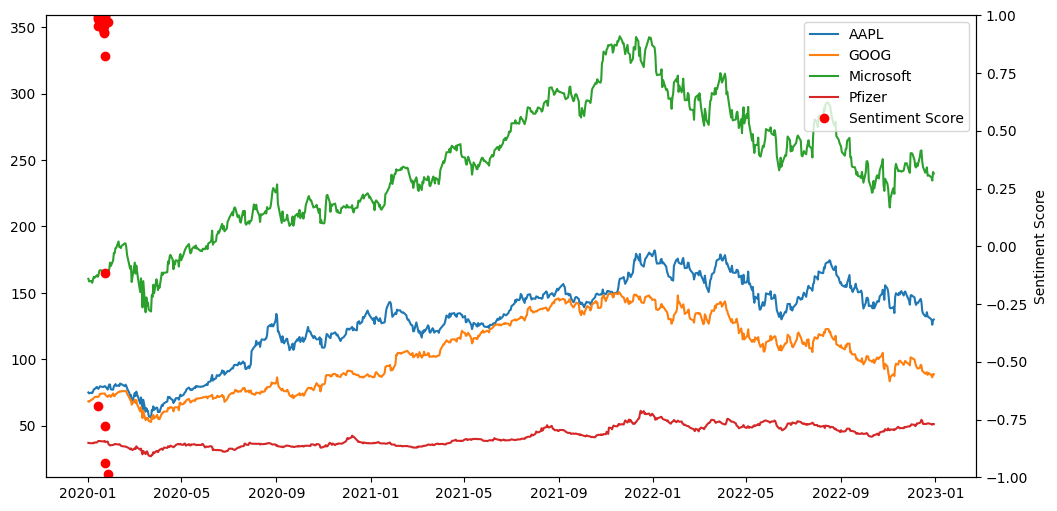

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Convert the 'Date' column to DatetimeIndex
date_index = pd.DatetimeIndex(super_sa[2][0]['Date'])

# Plot the sentiment data as scatter plots
ax2.plot(date_index, super_sa[2][0]['Sentiment'], 'ro', label='Sentiment Score')
ax2.set_ylabel('Sentiment Score')
ax2.set_ylim([-1, 1])  # Adjust the y-axis limits as needed

ax1.plot(apl['Date'],apl['Close'],label='AAPL')
ax1.plot(goog['Date'],goog['Close'],label='GOOG')
ax1.plot(ms['Date'],ms['Close'],label='Microsoft')
ax1.plot(pfe['Date'],pfe['Close'],label='Pfizer')



# Combine the legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

## Multiplot

In [40]:
print(apl['Date'].min())
print(apl['Date'].max())
a = apl['Date'][0]
m = apl['Date'][378]
e = apl['Date'][len(apl['Date'])-1]

2020-01-02
2022-12-30


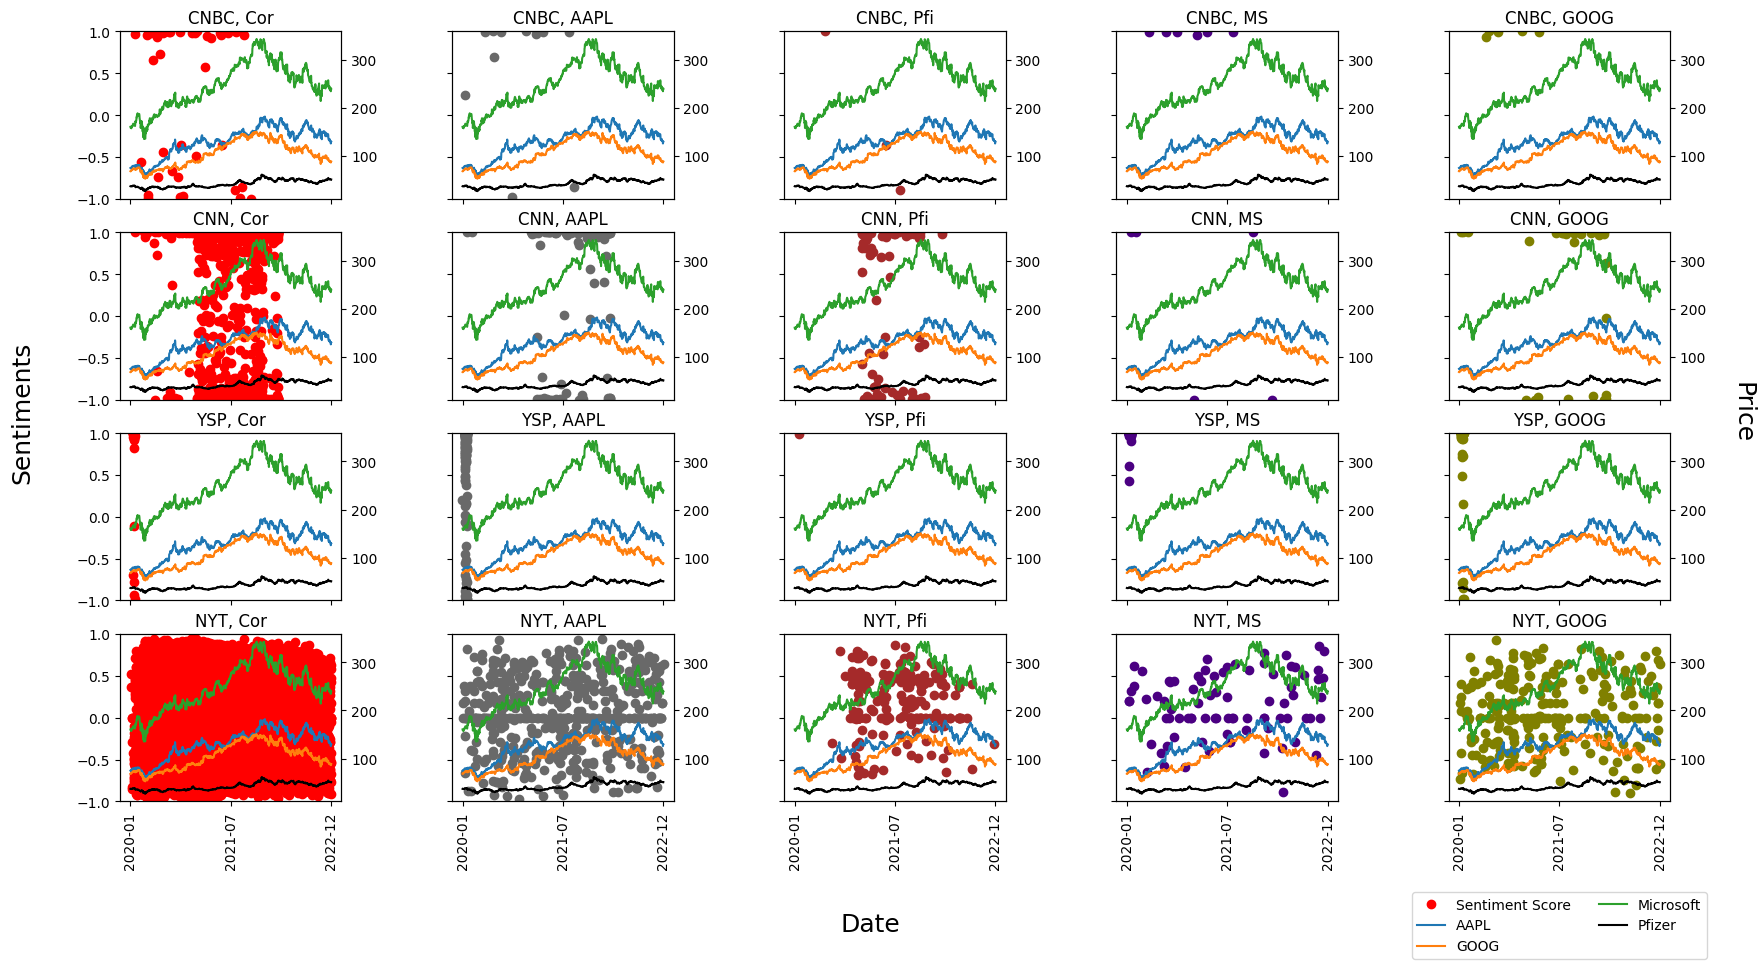

In [41]:
fig, ax1 = plt.subplots(len(super_sa), len(super_sa[0]), figsize=(20, 10),sharex=True,sharey='row')
ax2 = np.empty_like(ax1, dtype=object)

# x ticks for the x axis
a = apl['Date'][0]
m = apl['Date'][378]
e = apl['Date'][len(apl['Date'])-1]

# Create empty lists to store legend handles and labels
legend_handles = []
legend_labels = []

# for subtitles
kws_names = ['Cor', 'AAPL', 'Pfi', 'MS', 'GOOG']
source = ['CNBC', 'CNN', 'YSP', 'NYT']
colors = ['red','dimgray','brown','indigo','olive']
for i in range(len(super_sa)):
    for j in range(len(super_sa[i])):

        ax = ax1[i, j]
        ax.plot(super_sa[i][j]['Date'], super_sa[i][j]['Sentiment'],'o',color=colors[j], label='Sentiment Score')
        # ax.set_ylabel('Sentiment Score')
        ax.set_ylim([-1, 1])
        ax2[i, j] = ax.twinx()
        ax2[i, j].plot(apl['Date'], apl['Close'], label='AAPL')
        ax2[i, j].plot(goog['Date'], goog['Close'], label='GOOG')
        ax2[i, j].plot(ms['Date'], ms['Close'], label='Microsoft')
        ax2[i, j].plot(pfe['Date'], pfe['Close'], label='Pfizer',color='black')

        # date_ticks = apl['Date'].iloc[::len(apl['Date']) // 3]
        ax.set_xticks([a,m,e])
        ax.set_xticklabels([date.strftime('%Y-%m') for date in [a,m,e]], rotation=90)
        ax.set_title(f'{source[i]}, {kws_names[j]}')
        handles, labels = ax.get_legend_handles_labels()
        legend_handles.extend(handles)
        legend_labels.extend(labels)

        handles2, labels2 = ax2[i, j].get_legend_handles_labels()
        legend_handles.extend(handles2)
        legend_labels.extend(labels2)

# Set x-label and y-label for the entire plot
plt.subplots_adjust(wspace=0.5)  # Adjust the vertical spacing between subplots
plt.legend(legend_handles[0:5], legend_labels[0:5],loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=2)

fig.text(0.5, -.02, 'Date', ha='center',fontsize=18)
fig.text(.07, 0.5, 'Sentiments', va='center', rotation='vertical',fontsize=18)
fig.text(.93, 0.5, 'Price', va='center', rotation=270,fontsize=18)
plt.savefig('Stock-Price-Sentimental.png',dpi=600, transparent=True,bbox_inches = 'tight')

# Correlation

In [42]:
# Changing data frames
apl_df = apl[['Date','Close']]
apl_df.index = range(len(apl_df))
# print(type(apl_df))
goog_df = goog[['Date','Close']]
goog_df.index = range(len(apl_df))
ms_df = ms[['Date','Close']]
ms_df.index = range(len(apl_df))
pfe_df = pfe[['Date','Close']]
pfe_df.index = range(len(apl_df))

In [43]:
# super correlation list
super_corr_lst = []

# correlation multiplot
for i in range(len(super_sa)):
    correlation_one = []
    for j in range(len(super_sa[i])):
      # Sentiments
      df_sa = super_sa[i][j][['Date','Sentiment']]
      m_sa_df = df_sa.groupby('Date')['Sentiment'].mean().reset_index() # Calculate the mean sentiment for each unique date
      m_sa_df.columns = ['Date', 'Sentiment'] # Rename the columns
      m_sa_df['Date'] = pd.to_datetime(m_sa_df['Date'])
      # print(m_sa_df['Sentiment'][0], 'Part 1')
      m_index = []
      mi_ind = []
      # print(len(m_index))
      # print(len(mi_ind))
      for date1 in goog_df['Date']:
        for date2 in m_sa_df['Date']:
            if date1 == date2:
                m_index.append(goog_df[goog_df['Date'] == date1].index[0])
                mi_ind.append(m_sa_df[m_sa_df['Date'] == date2].index[0])
      # New index
      m_sa_df = m_sa_df.loc[mi_ind]
      m_sa_df.index = range(len(m_sa_df))
      apl_correlation = apl_df.loc[m_index]
      apl_correlation.index = range(len(apl_correlation))
      goog_correlation = goog_df.loc[m_index]
      goog_correlation.index  = range(len(goog_correlation))
      ms_correlation = ms_df.loc[m_index]
      ms_correlation.index  = range(len(ms_correlation))
      pfe_correlation = pfe_df.loc[m_index]
      pfe_correlation.index  = range(len(pfe_correlation))
      apl_correlation.rename(columns={'Close': 'AAPL'}, inplace=True)
      goog_correlation.rename(columns={'Close': 'GOOG'}, inplace=True)
      ms_correlation.rename(columns={'Close': 'MS'}, inplace=True)
      pfe_correlation.rename(columns={'Close': 'Pfe'}, inplace=True)
      m = m_sa_df['Sentiment']
      a = apl_correlation['AAPL']

      g = goog_correlation['GOOG']

      ms = ms_correlation['MS']

      pfe = pfe_correlation['Pfe']

      merged_df = pd.concat([m, a, g, ms, pfe], axis=1)
      cor_df = merged_df.corr()

      # put in first list
      correlation_one.append(cor_df)
    super_corr_lst.append(correlation_one)


<ipython-input-43-30837e399ccc>:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date1 == date2:
<ipython-input-43-30837e399ccc>:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date1 == date2:
<ipython-input-43-30837e399ccc>:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date1 == date2:
<ipython-input-43-30837e399ccc>:20: FutureWarning: Comparison of Timestamp with datetime.date 

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


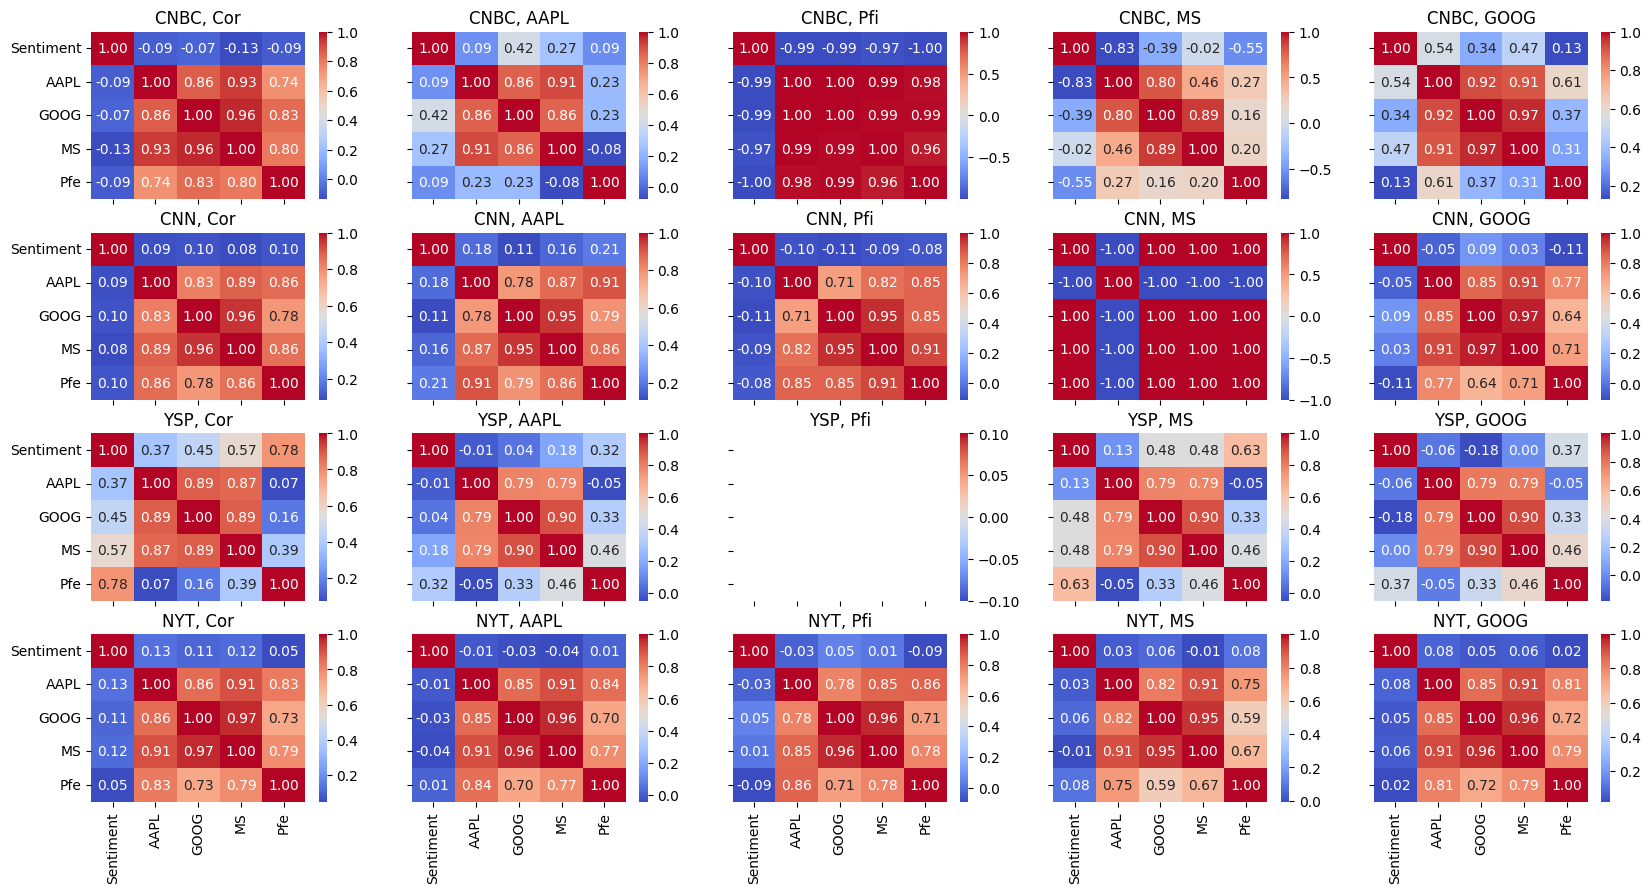

In [44]:
fig, axs = plt.subplots(len(super_sa), len(super_sa[0]), figsize=(20, 10),sharex=True,sharey=True)

kws_names = ['Cor', 'AAPL', 'Pfi', 'MS', 'GOOG']
source = ['CNBC', 'CNN', 'YSP', 'NYT']

labels = ['Sentiment','AAPL','GOOG','MS','Pfe']
for i in range(len(super_corr_lst)):
    for j in range(len(super_corr_lst[i])):
        ax = axs[i, j]
        # mask=mask,
        sb.heatmap(super_corr_lst[i][j], fmt=".2f", annot=True, cmap='coolwarm', cbar=True, ax=ax)
        ax.set_title(f'{source[i]}, {kws_names[j]}')
        # plt.xticks(fontsize=12, rotation=60)
        # plt.yticks(fontsize=12, rotation=0)
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)



plt.savefig('Correlation.png',dpi=600, transparent=True,bbox_inches = 'tight')